In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
# from matplotlib import rc
# rc('text', usetex=True)

In [2]:
pwd

'C:\\Users\\aksha\\OneDrive - Wayne State University\\Ph.D\\Project3_GraphCompression\\ParallelRandom_CPGC'

In [7]:
df = pd.read_csv("sequentialRandomizedCPGCResults_PSC.csv")
list(df.columns)

['graphNodes',
 'density',
 'expNo',
 'delta',
 'compressionRatio',
 'executionTime',
 'readTime',
 'writeTime']

In [8]:
nodes = list(df['graphNodes'].unique())
density = list(df['density'].unique())
expNo = list(df['expNo'].unique())
# cores = list(df['cores'].unique())
delta = list(df['delta'].unique())
nodes.remove(32768)
nodes
n_pow = str(r"$2^{14}$")
n_pow

'$2^{14}$'

In [21]:
node_map = {
    2048: r'$2^{11}$',
    4096: r'$2^{12}$',
    8192: r'$2^{13}$',
    16384: r'$2^{14}$'
}
node_map
nodes1 = [node_map[n] if n in node_map else n for n in nodes]
nodes1

['$2^{11}$', '$2^{12}$', '$2^{13}$', '$2^{14}$']

In [9]:
density

[80, 85, 90, 95, 98]

In [10]:
delta

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [11]:
color = ['gainsboro', 'silver', 'darkgrey', 'grey', 'dimgrey']

In [12]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = [x for x in data if (x >= lower_bound and x <= upper_bound)]
    return filtered_data # round(np.mean(filtered_data), 2)

In [13]:
avgCompRatio = {}
avgExeTime = {}
avgWriteTime = {} 
avgReadTime =  {}
avgMergeTime =  {}


for n in nodes:
    for d in density:
        for e in expNo:
            for de in delta:
                avgCompRatio[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].compressionRatio.tolist())
                avgExeTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                  (df['delta'] == de)].executionTime.tolist())
                avgWriteTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].writeTime.tolist())
                avgReadTime[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & 
                                   (df['delta'] == de)].readTime.tolist())
                

In [86]:
n = 16384
d = 80
e = 1
c = 8
de = 0.5

np.mean(df[(df['graphNodes'] == n) & (df['density'] == d) & (df['expNo'] == e) & (df['delta'] == de)].executionTime.tolist())

88.09791179999999

In [14]:
np.mean(avgReadTime[(n,d,e,de)])

42.665394799999994

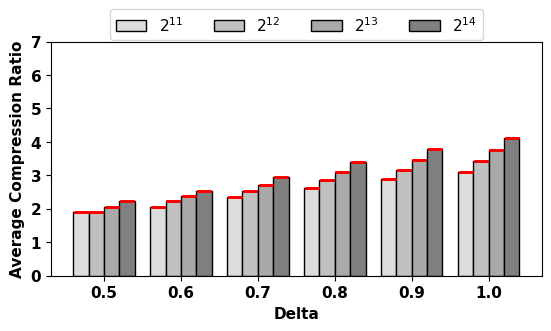

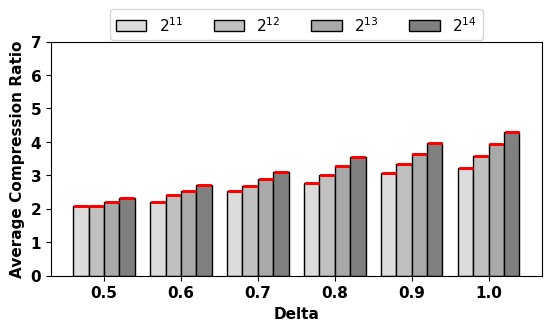

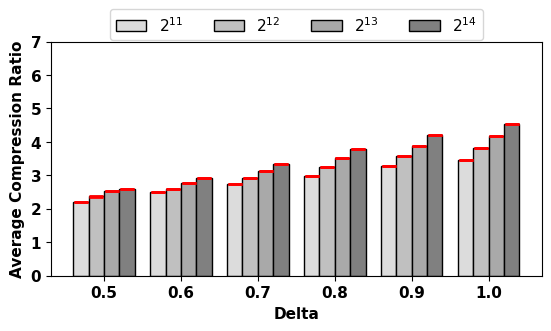

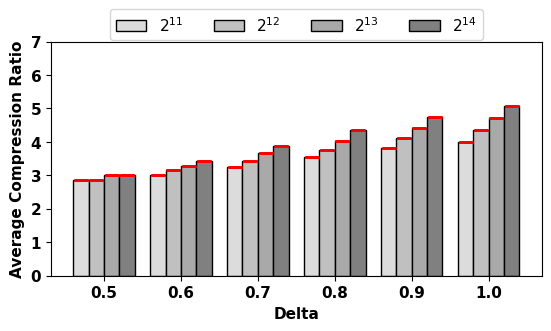

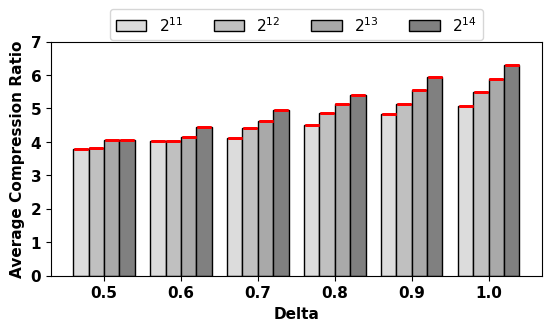

In [80]:
# we want to show that increasing delta increases the compression rate therefore we plot for fixed density and fixed cores
# x axis is delta and y axis is compression ratio for 3 different nodes

pos = [-2, -1, 1, 2]
for d in density:
    e = 1
    plotData = {}
    plotStd = {}
    for n in nodes:
        plotData[n] = []   
        plotStd[n] = []
        for de in delta:
            plotData[n].append(np.mean(avgCompRatio[(n,d,e,de)]))
            plotStd[n].append(statistics.stdev(avgCompRatio[(n,d,e,de)]))

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(delta))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0
    
    for n in nodes:
        power = nodes1[i]
#         print(power)
#         plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"$2^{power}$", color = color[i], edgecolor = 'k', yerr = plotStd[n], ecolor='red', capsize=3)
        plt.bar(x + i * bar_width - (0.5* bar_width), plotData[n], width=bar_width, label=f"{power}", color=color[i], edgecolor='k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Delta', fontsize=11, weight = 'bold')
    plt.ylabel('Average Compression Ratio', fontsize=11, weight = 'bold')
#     plt.title(f'For {d}% density', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, delta, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
    plt.ylim(0,7)
    plt.savefig(f'plots/compression_ratio_vs_delta_with_density_{d}.pdf', dpi=300)
    plt.show()

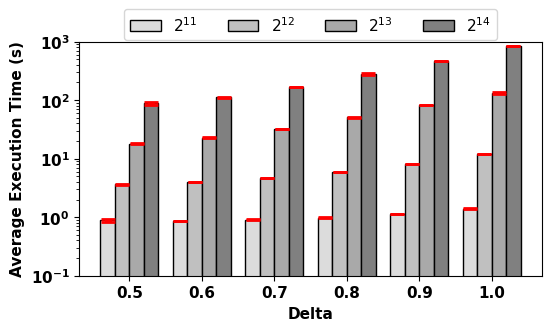

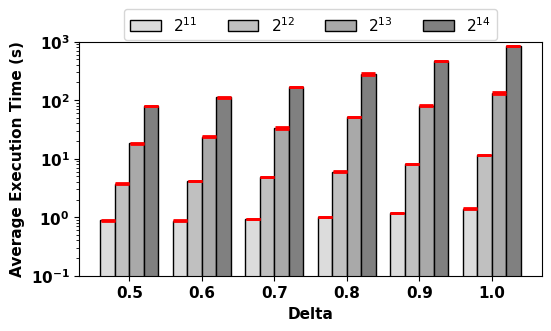

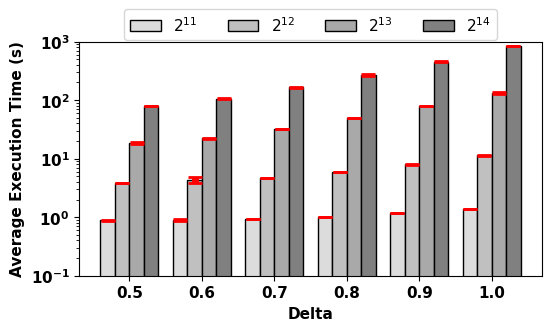

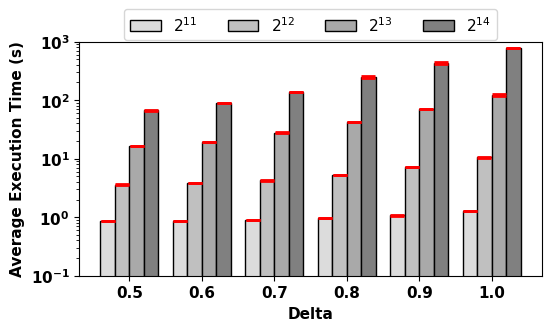

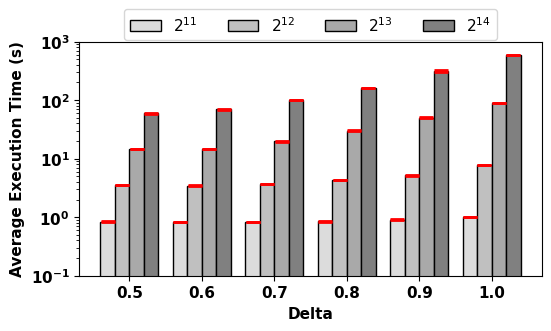

In [79]:
# we want to show that with increasing cores decreses the execution time therefore we plot for fixed density and fixed delta
# x axis is cores and y axis is execution time for 3 different nodes

for d in density:
    e = 1
    plotData = {}
    plotStd = {}
    for n in nodes:
        plotData[n] = []   
        plotStd[n] = []
        for de in delta:
            plotData[n].append(np.mean(avgExeTime[(n,d,e,de)]))
            plotStd[n].append(statistics.stdev(avgExeTime[(n,d,e,de)]))

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(delta))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0

    for n in nodes:
        power = nodes1[i]
#         print(power)
#         plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"$2^{power}$", color = color[i], edgecolor = 'k', yerr = plotStd[n], ecolor='red', capsize=3)
        plt.bar(x + i * bar_width- (0.5* bar_width), plotData[n], width=bar_width, label=f"{power}", color=color[i], edgecolor='k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Delta', fontsize=11, weight = 'bold')
    plt.ylabel('Average Execution Time (s)', fontsize=11, weight = 'bold')
#     plt.title(f'For {d}% density', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, delta, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
    plt.ylim(0.1,1001)
    plt.yscale('log')
    plt.savefig(f'plots/Average_execution_time_vs_delta_with_density_{d}.pdf', dpi=300)
    plt.show()    

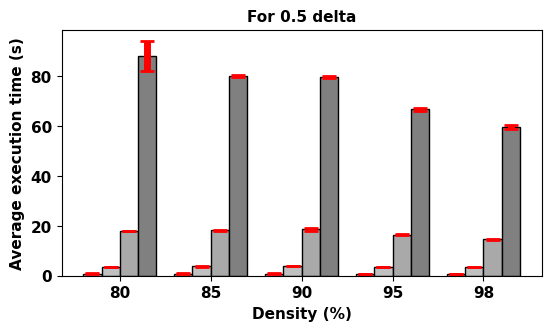

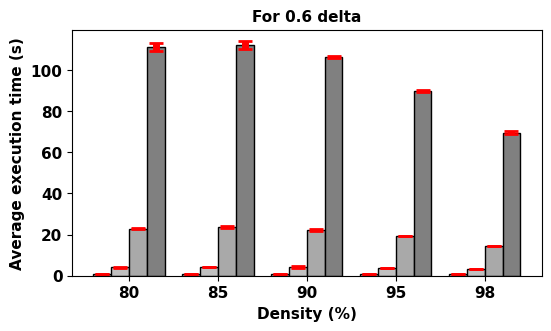

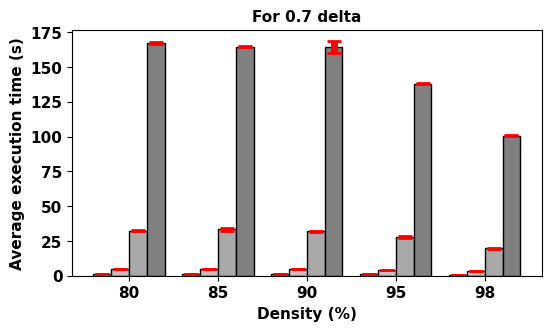

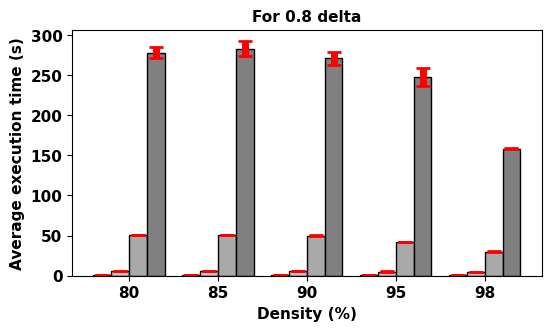

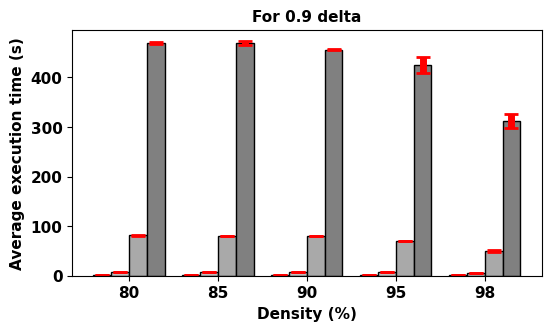

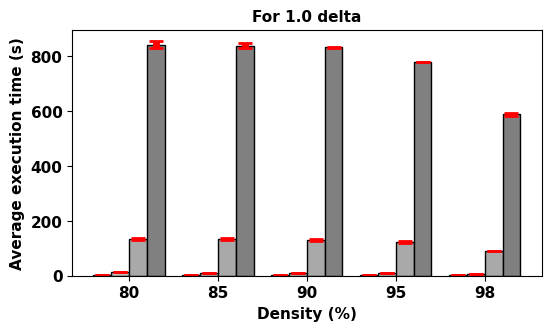

In [82]:
# we want to show that with increasing density increases the execution time therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

for de in delta:
    e = 1
    plotData = {}
    plotStd = {}
    for n in nodes:
        plotData[n] = []   
        plotStd[n] = []
        for d in density:
            plotData[n].append(np.mean(avgExeTime[(n,d,e,de)]))
            plotStd[n].append(statistics.stdev(avgExeTime[(n,d,e,de)]))

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(density))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0

    for n in nodes:
        power = nodes1[i]
#         print(power)
#         plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"$2^{power}$", color = color[i], edgecolor = 'k', yerr = plotStd[n], ecolor='red', capsize=3)
        plt.bar(x + i * bar_width- (0.5* bar_width), plotData[n], width=bar_width, label=f"{power}", color=color[i], edgecolor='k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
    plt.ylabel('Average execution time (s)', fontsize=11, weight = 'bold')
    plt.title(f'For {de} delta', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
#     plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
#     plt.ylim(0.1,1501)
#     plt.yscale('log')
#     plt.savefig(f'plots/Average_execution_time_vs_density_with_delta_{de}.pdf', dpi=300)
    plt.show()

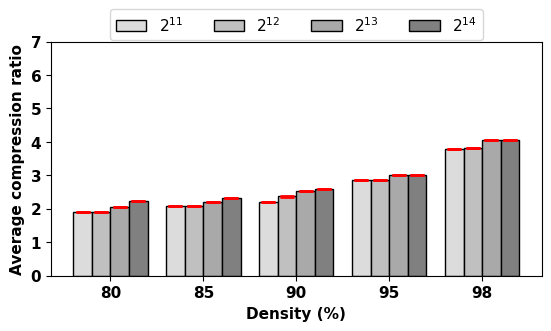

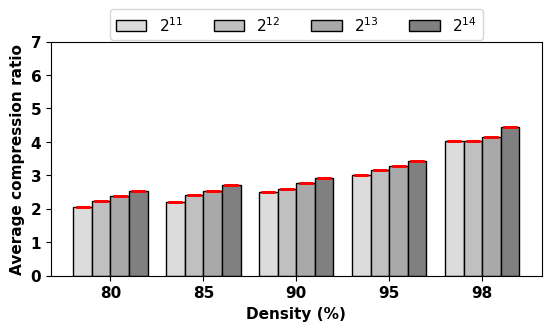

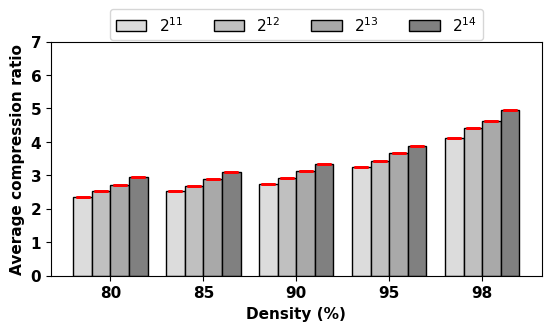

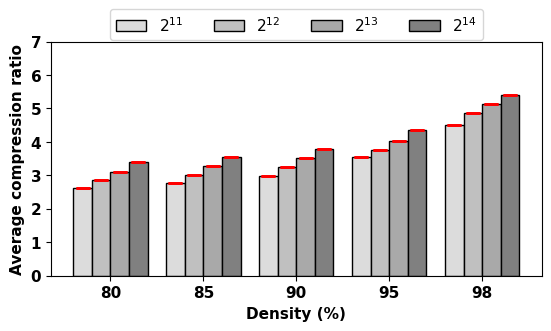

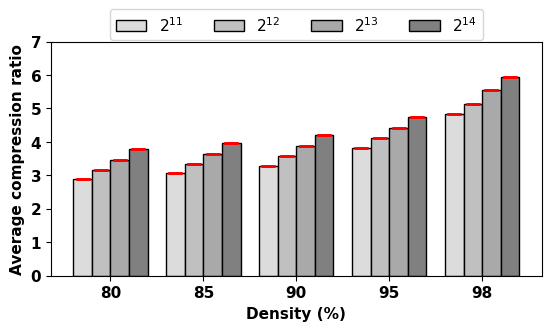

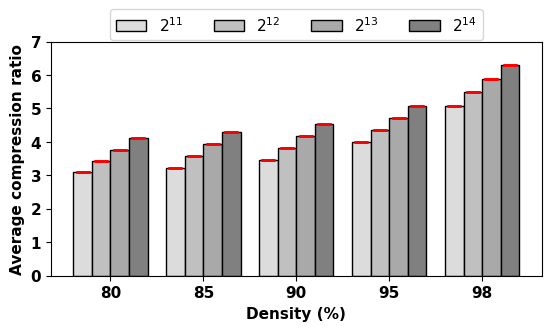

In [78]:
# we want to show that with increasing density increases the compression ratio therefore we plot for fixed cores and fixed delta
# x axis is density and y axis is execution time for 3 different nodes

e = 1
# density2.remove(100)
# density = sorted(density2)

for de in delta:
    e = 1
    plotData = {}
    plotStd = {}
    for n in nodes:
        plotData[n] = []   
        plotStd[n] = []
        for d in density:
            plotData[n].append(np.mean(avgCompRatio[(n,d,e,de)]))
            plotStd[n].append(statistics.stdev(avgCompRatio[(n,d,e,de)]))

    bar_width = 0.2  # Width of each bar
    x = np.arange(len(density))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.2])
    i = 0
    
    for n in nodes:
        power = nodes1[i]
#         print(power)
#         plt.bar(x + i * bar_width, plotData[n], width=bar_width, label= f"$2^{power}$", color = color[i], edgecolor = 'k', yerr = plotStd[n], ecolor='red', capsize=3)
        plt.bar(x + i * bar_width - (0.5* bar_width), plotData[n], width=bar_width, label=f"{power}", color=color[i], edgecolor='k', yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1

    fc = 11
    # Adding labels, title, and legend
    plt.xlabel('Density (%)', fontsize=11, weight = 'bold')
    plt.ylabel('Average compression ratio', fontsize=11, weight = 'bold')
#     plt.title(f'For {de} delta', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, density, fontsize=11, weight = 'bold')
    plt.yticks(fontsize=11, weight = 'bold')
    plt.legend(ncol = 6, fontsize=11, loc = 'upper center', bbox_to_anchor = (0.5, 1.17))
    plt.ylim(0,7)
    plt.savefig(f'plots/compression_ratio_vs_density_with_delta_{de}.pdf', dpi=300)
    plt.show()